# Monte-Carlo Simulations in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## 1. Estimating Probabilities from Distributions

We can estimate the probability of a distribution by randomly generating $n$ samples from a given distribution (e.g., normal or gamma). We then apply a specific condition to each sample and count how many satisfy it. The probability is estimated by dividing the count of satisfying samples by $n$. This process is repeated $M$ times to improve accuracy, and the final probability is the average of the results from all iterations. This approach allows us to estimate probabilities through simulation.

$\normalsize \text{1.1 Given } X \sim N(650, 50^2), \text{ find P} (X<650).$

In [2]:
M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    x = np.random.normal(600, 50, n)
    prob[i] = len(x[x<650])/n
    
print(f'P(X<650) = {round(np.mean(prob),3)}')

P(X<650) = 0.841


$\normalsize \text{1.2 Given } X \sim \Gamma(2, 9), \text{ find P} (X>22).$

In [3]:
N = 1000
n = 10000
prob = [0]*M

for i in range(M):
    x = np.random.gamma(2,9, n)
    prob[i] = len(x[x>22])/n
    
print(f'P(X>22) = {round(np.mean(prob),3)}')

P(X>22) = 0.299


$\normalsize \text{1.3 Given } X \sim \Gamma(2, 9), \text{ find P} (\frac{x^2 + 1}{2x + 3}>7).$

In [4]:
N = 1000
n = 10000
prob = [0]*M

for i in range(M):
    x = np.random.gamma(2,9, n)
    prob[i] = len(x[((x**2+1)/(2*x+3))>7])/n
    
print(f'P((x^2 + 1)/(2x + 3) > 7) = {round(np.mean(prob), 3)}')

P((x^2 + 1)/(2x + 3) > 7) = 0.493


$\normalsize \text{1.4 Given } X \sim N(15, 7) \text{ and } Y \sim \Gamma(3, 10), \text{ find } P(X > Y).$

In [5]:
N = 1000
n = 10000
prob = [0]*M

for i in range(M):
    x = np.random.normal(15, 7, n)
    y = np.random.gamma(3, 10, n)
    prob[i] = len(x[x > y])/n
    
print(f'P(X>Y) = {round(np.mean(prob),3)}')

P(X>Y) = 0.212


## 2. Estimating Probabilities from PDFs

We can estimate the probability from a probability density function (PDF) by using the inverse transform sampling method. First, we generate $n$ random samples from a uniform distribution $U(0,1)$. Then, we apply the inverse cumulative density function $G(x)$ of the given PDF to these samples. The transformed values are drawn from the desired distribution. Next, we apply a specific condition to these transformed samples and calculate the proportion that satisfies the condition. This gives an estimate of the desired probability.

$
\text{E.g., To simulate Pr} (X< N): \\
\bullet \ \text{ Generate }w_1,...,w_n\sim U(0,1) \\
\bullet \text{ Obtain }x_i=G(w_i) \text{ for } i=1,...,n \\
\bullet \text{ Count }x_i< N, \text{count}=r \\
\bullet \text{ The estimate Pr}(X< N) = \frac{r}{n}
$

$
\large \text{2.1 Find P} (X\le1)\text{, given that the PDF is }\\
$
$$
\large f(x)=\frac{3}{8}x^2\ , \ 0\le x\le 2 \\
$$

$
\normalsize \text{The PDF of } x \text{ is given by} \\
$
$$
\normalsize f(x)=\frac{3}{8}x^2\ , \ 0\le x\le 2 \\
$$
$
\normalsize \text{Then, the CDF is} \\
$
$$
\normalsize F(x) = \int_{0}^{x}f(t) \ dt=\frac{1}{8}x^3 \\
$$
$
\normalsize \text{The inverse function of } F(x): G(x)=F^{-1}(x) \\
$
$$
\normalsize G(x)=2x^{\frac{1}{3}}
$$

In [6]:
def G(x):
    return 2*x**(1/3)

M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    w = np.random.uniform(0, 1, n)
    x = G(w)
    prob[i] = len(x[x<1])/n
    

print(f'P(X<=1) = {round(np.mean(prob),3)}')

P(X<=1) = 0.125


$
\large \text{2.2 Find P} (X\ge1)\text{, given that the PDF is }\\
$
$$
\large f(x)=\frac{1}{2}e^x\ , \ \text{ln}2\le x\le \text{ln}4 \\
$$

$
\normalsize \text{Given the PDF, the CDF is} \\
$
$$
\normalsize F(x) = \int_{\text{ln}2}^{x}f(t) \ dt=\frac{1}{2}e^x-1 \\
$$
$
\normalsize \text{The inverse function of } F(x): G(x)=F^{-1}(x) \\
$
$$
\normalsize G(x)=\text{log}\bigl(2(x+1)\bigl)
$$

In [7]:
def G(x):
    return np.log(2*(x+1))

M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    w = np.random.uniform(0, 1, n)
    x = G(w)
    prob[i] = len(x[x>=1])/n
    

print(f'P(X>=1) = {round(np.mean(prob),3)}')

P(X>=1) = 0.641


$
\large \text{2.3 Find P} (X\lt1)\text{, given that the PDF is }\\
$
$$
\large f(x)=\text{sin}(2x) \ ,\ 0\le x\le \frac{\pi}{2} \\
$$

$
\normalsize \text{Given the PDF, the CDF is} \\
$
$$
\normalsize F(x) = \int_{0}^{x}f(t) \ dt= \frac{1}{2}-\frac{\text{cos}(2x)}{2} \\
$$
$
\normalsize \text{The inverse function of } F(x): G(x)=F^{-1}(x) \\
$
$$
\normalsize G(x)=\frac{1}{2}\text{cos}^{-1}(-2x+1)
$$

In [8]:
def G(x):
    return (1/2)*(np.arccos(-2*x+1))

M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    w = np.random.uniform(0, 1, n)
    x = G(w)
    prob[i] = len(x[x<=1])/n
    

print(f'P(X>=1) = {round(np.mean(prob),3)}')

P(X>=1) = 0.708


$
\large \text{2.4 Find P} (X\gt2)\text{, given that the PDF is }\\
$
$$
\large f(x)=\frac{1}{2}e^{-\frac{1}{2}x} \ ,\ 0\le x\lt \infty  \\
$$

$
\normalsize \text{Given the PDF, the CDF is} \\
$
$$
\normalsize F(x) = \int_{0}^{x}f(t) \ dt= -e^{-\frac{x}{2}}+1 \\
$$
$
\normalsize \text{The inverse function of } F(x): G(x)=F^{-1}(x) \\
$
$$
\normalsize G(x)=-2\text{ln}(1-x)
$$

In [9]:
def G(x):
    return -2*np.log(1-x)

M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    w = np.random.uniform(0, 1, n)
    x = G(w)
    prob[i] = len(x[x>2])/n
    

print(f'P(X>=1) = {round(np.mean(prob),3)}')

P(X>=1) = 0.368


$
\large \text{2.4 Find P} (X\gt Y)\text{, given that the PDF is }\\
$
$$
\large X\sim f_{1}(x)=3x^2 \ ,\ 0\le x\le 1 \\
\large Y\sim f_{2}(y)=2y \ ,\ 0\le y\le 1 \\
$$

$
\normalsize \text{Given the PDFs, the CDFs are} \\
$
$$
\normalsize F_{1}(x) = \int_{0}^{x}f_{1}(t) \ dt= x^3\\
$$
$$
\normalsize F_{2}(y) = \int_{0}^{y}f_{2}(t) \ dt= y^2\\
$$
$
\normalsize \text{The inverse function of } F_{1}(x): G_{1}(x)=F_{1}^{-1}(x) \\
$
$$
\normalsize G_{1}(x)=x^{\frac{1}{3}}
$$
$
\normalsize \text{ and }F_{2}(x): G_{2}(y)=F_{2}^{-1}(y)\\
$
$$
\normalsize G_{2}(y)=\sqrt{y}
$$

In [10]:
def G1(x):
    return x**(1/3)

def G2(y):
    return np.sqrt(y)

M = 1000
n = 10000
prob = [0]*M

for i in range(M):
    w1 = np.random.uniform(0, 1, n)
    w2 = np.random.uniform(0, 1, n)
    x = G1(w1)
    y = G2(w2)
    prob[i] = len(x[x>y])/n
    

print(f'P(X>Y) = {round(np.mean(prob),3)}')

P(X>Y) = 0.6


## 3. Monte-Carlo Integration 

Monte Carlo integration estimates an integral by averaging the function values at $n$ random points uniformly sampled from $[a, b]$, then scaling by $(b-a)$. Repeating this $ M $ times and averaging the results improves accuracy, making it useful for complex or high-dimensional integrals.

$
\text{Goal: Evaluate the Integral using random sampling}\\
$
$$
I = \int_{a}^{b}f(x)\ dx \\
$$
$
\text{Suppose we have random samples }X_1, ...,X_n \text{from a uniform distribution} \\
$
$$
X_1, ...,X_n \sim U(a,b) \\
$$
$
\text{Then, }I \text{ can be estimated by Monte-Carlo estimator }M_n \text{, which is defined by} \\
$
$$
M_n = \frac{(b-a)}{n}\sum_{i=1}^{n}f(X_i) \\
$$
$
\text{as the integral }I \text{ can be expressed in terms of the expected value}\\
$
$$
I = \int_{a}^{b}f(x) \ dx = (b-a)\cdot E[f(x)] \ \text{  where  } \ E[f(x)]\approx \frac{1}{n}\sum_{i=1}^{n}f(x_i) 
$$

$
\large \text{3.1 Estimate the function } f(x)=x^2\text{ for the interval } 1\le x\le 3.\\
$

In [11]:
a = 1
b = 3

M = 1000
n = 10000

def f(x):
    return x**2

MCI = [0]*M

for i in range(M):
    x = np.random.uniform(a, b, n)
    expected_value = np.sum(f(x))/n
    MCI[i] = (b-a)*expected_value
    
print(f'Estimate of integral = {round(np.mean(MCI),3)}')

Estimate of integral = 8.665


$
\large \text{3.2 Given }X\sim N(10,3^2)\text{, Find Pr}(X>14) \\
$

$$
\normalsize \text{Let }f(x)= \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}\\
\normalsize \text{Then, }{Pr}(X>14)=\int_{14}^{\infty } f(x)dx\approx \int_{14}^{20} f(x)dx
$$

In [12]:
a = 14
b = 20

M = 1000
n = 10000

# Normal Distribution
m = 10
s = 3


# Estimating function
def f(x, m, s):
    return 1/(s*np.sqrt(2*math.pi))*(math.e**(-(((x-m)/s)**2)/2))

MCI = [0]*M

for i in range(M):
    x = np.random.uniform(a, b, n)
    expected_value = np.sum(f(x, m, s))/n
    MCI[i] = (b-a)*expected_value
    
print('Estimate of integral: ', round(np.mean(MCI), 4))

Estimate of integral:  0.0908


## Monte-Carlo Problems

### Broken Stick Problem

**Probability to form a triangle**

In [13]:
N = 1000
n = 10000
prob = [0]*M

for j in range(M):
    count = 0 
    
    for i in range(n):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        a = min(x,y)
        b = max(x,y)-min(x,y)
        c = 1-max(x,y)
        
        if (a+b)>c and (b+c)>a and (a+c)>b:
            count += 1
            
    prob[j] = count/n
    
print('Probability: ', round(np.mean(prob), 4))

Probability:  0.25


**Probability to form an acute triangle**

In [14]:
N = 1000
n = 10000
prob = [0]*M

for j in range(M):
    count = 0 
    
    for i in range(n):
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        a = min(x,y)
        b = max(x,y)-min(x,y)
        c = 1-max(x,y)
        
        if (a**2+b**2)>c**2 and (b**2+c**2)>a**2 and (a**2+c**2)>b**2:
            count += 1
            
    prob[j] = count/n
    
print('Probability: ', round(np.mean(prob), 4))

Probability:  0.0795


**All possible triangle probabilities**

In [15]:
M = 10000
n = 10000
epsilon = 1e-10

prob_acute = [0] * M
prob_right = [0] * M
prob_obtuse = [0] * M
prob_total = [0] * M

for j in range(M):
    count_acute = 0
    count_right = 0
    count_obtuse = 0

    for i in range(n):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        a = min(x, y)
        b = max(x, y) - min(x, y)
        c = 1 - max(x, y)

        if (a+b>c) and (b+c>a) and (c+a>b):
            
            if (a**2 + b**2 > c**2) and (b**2 + c**2 > a**2) and (c**2 + a**2 > b**2):
                count_acute += 1
                
            elif (abs(a**2 + b**2 - c**2) < epsilon
                  or abs(b**2 + c**2 - a**2) < epsilon
                  or abs(c**2 + a**2 - b**2) < epsilon):
                count_right += 1
                
            else:
                count_obtuse += 1

    prob_acute[j] = count_acute / n
    prob_right[j] = count_right / n
    prob_obtuse[j] = count_obtuse / n
    prob_total[j] = (count_acute + count_right + count_obtuse) / n

# Final probabilities
mean_prob_acute = np.mean(prob_acute)
mean_prob_right = np.mean(prob_right)
mean_prob_obtuse = np.mean(prob_obtuse)
mean_prob_total = np.mean(prob_total)

print(f"Probability of acute triangles: {mean_prob_acute:.4f}")
print(f"Probability of right triangles: {mean_prob_right:.4f}")
print(f"Probability of obtuse triangles: {mean_prob_obtuse:.4f}")
print(f"Total probability (sanity check): {mean_prob_total:.4f}")

Probability of acute triangles: 0.0794
Probability of right triangles: 0.0000
Probability of obtuse triangles: 0.1706
Total probability (sanity check): 0.2500


### Buffon's Needle

Mean: 0.318, SD: 0.001


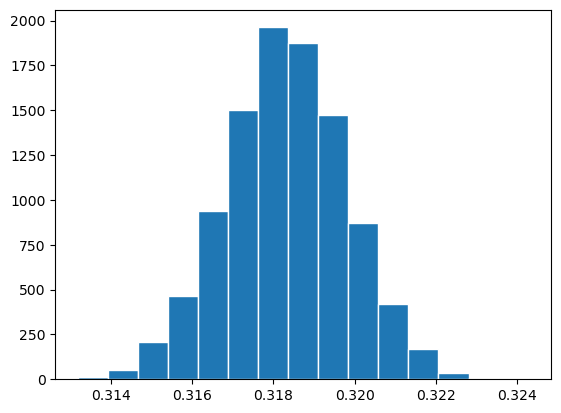

In [16]:
M = 10000
n = 100000

D = 4
L = 2

prob = [0]*M

for i in range(M):
    x = np.random.uniform(0, D/2, n)
    theta = np.random.uniform(0, math.pi/2, n)

    prob[i] = len(x[x<((L/2)*np.sin(theta))])/n
    
print(f'Mean: {round(np.mean(prob),3)}, SD: {round(np.std(prob),3)}')
plt.hist(prob, bins=15, edgecolor='white')
plt.show()

**Estimating pi**

In [17]:
est_pi = 2*L/(D*np.mean(prob))
print(f'Estimating pi value: {round(est_pi,5)}')

Estimating pi value: 3.14153


### Estimating pi

Estimating pi: 3.142232


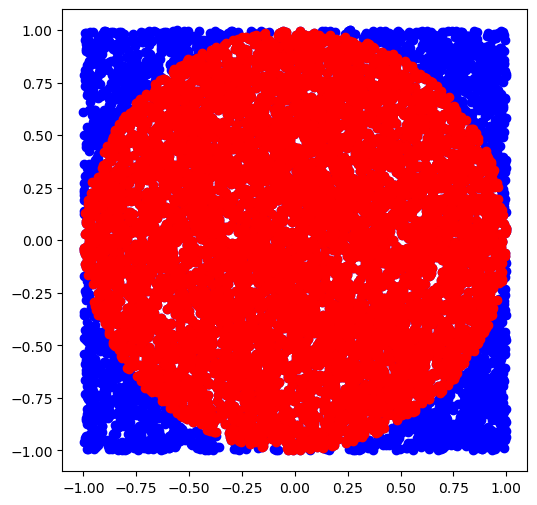

In [18]:
M = 1000
n = 10000

pi = [0]*M

for j in range(M):
    x = np.random.uniform(-1, 1, n)
    y = np.random.uniform(-1, 1, n)

    x1 = [0]*n
    y1 = [0]*n

    count = 0
    for i in range(n):
        if (x[i]**2 + y[i]**2 < 1):
            count += 1
            x1[i], y1[i] = x[i], y[i]
            
    pi[j] = count / n * 4


print(f'Estimating pi: {np.mean(pi)}')

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='blue')
plt.scatter(x1, y1, color='red')
plt.show()

### Monty Hall Problem

In [19]:
M = 100
n = 1000

prob = [0]*M

for i in range(M):
    correct = 0
    
    for j in range(n):
        door_w_car = random.randint(1, 3)
        door_picked = random.randint(1, 3)

        door_choices = [door for door in range(1, 4) if door != door_w_car and door != door_picked]
        door_open = random.choice(door_choices)
        
        new_door_choice = [door for door in range(1, 4) if door != door_picked and door != door_open][0]
        
        if new_door_choice == door_w_car:
            correct += 1
    
    prob[i] = correct / n

print("Average probability of winning when switching doors:", round(sum(prob)/M,5))

Average probability of winning when switching doors: 0.66655
